# Loading Libraries and Dataset. Pre visualization study and data transformations

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from seaborn import categorical
import matplotlib.pyplot as plt
#import folium
#from geopy import geocoders
#from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

C:\Users\User\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import random
random.seed( 3 )

In [6]:
marine_data = pd.read_excel('Marine_Pollution.xlsx')
#marine_data = marine_data.dropna(subset = ['Pollutant'])

In [9]:
marine_data.head()

,Date,Region,Source,Ship Type,Area,Location,Pollutant,Estimated Litres
0,2008-03-19,Cairns,Ship,Naval,Port,"HMAS Cairns, Cairns",Other,2.5
1,2012-10-30,Townsville,Ship,Commercial,Port limits,Berth 10 Townsville Harbour,NaN,1.0
2,2013-03-14,Cairns,Ship,Fishing,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,3.0
3,2013-04-11,Cairns,Ship,Trading Ship,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,0.0
4,2003-10-07,Brisbane,Ship,Recreation,Port,"Newport Waterways, Scarborough",Sheen,2.0


In [10]:
len(marine_data)

1012

In [11]:
#Steps
#1. Convert date to features
#2. Imputing missing/NA values
#3. Visualization
#4. Implementation of algorithms - Testing various algos for accuracy

Feature Engineering on Date Column to study its impact on Litres of Pollution

In [12]:
marine_data['year'] = marine_data['Date'].dt.year
marine_data['month'] = marine_data['Date'].dt.month
marine_data['day'] =marine_data['Date'].dt.day
marine_data['quarter'] = marine_data['Date'].dt.quarter
marine_data['weekday'] = marine_data['Date'].dt.weekday

marine_data = marine_data.drop('Date', axis = 1)

In [13]:
marine_data.dtypes

Region               object
Source               object
Ship Type            object
Area                 object
Location             object
Pollutant            object
Estimated Litres    float64
year                  int64
month                 int64
day                   int64
quarter               int64
weekday               int64
dtype: object

In [14]:
marine_data['Estimated Litres'] = pd.to_numeric(marine_data['Estimated Litres'], errors='coerce')
marine_data.head()

,Region,Source,Ship Type,Area,Location,Pollutant,Estimated Litres,year,month,day,quarter,weekday
0,Cairns,Ship,Naval,Port,"HMAS Cairns, Cairns",Other,2.5,2008,3,19,1,2
1,Townsville,Ship,Commercial,Port limits,Berth 10 Townsville Harbour,NaN,1.0,2012,10,30,4,1
2,Cairns,Ship,Fishing,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,3.0,2013,3,14,1,3
3,Cairns,Ship,Trading Ship,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,0.0,2013,4,11,2,3
4,Brisbane,Ship,Recreation,Port,"Newport Waterways, Scarborough",Sheen,2.0,2003,10,7,4,1


In [15]:
marine_data.columns[marine_data.isna().any()].tolist()

['Ship Type', 'Pollutant']

# Creating models for imputation of missing values for above variables - namely Ship_type and Pollutant


In [16]:
marine_data.dtypes

Region               object
Source               object
Ship Type            object
Area                 object
Location             object
Pollutant            object
Estimated Litres    float64
year                  int64
month                 int64
day                   int64
quarter               int64
weekday               int64
dtype: object

In [17]:
test_data = marine_data[marine_data['Ship Type'].isnull()]

#Changing train data
train = marine_data.dropna(subset = ['Ship Type'])
ship_type = train['Ship Type']
new_train = train.drop(['Pollutant', 'Ship Type','Location', 'Estimated Litres', 'Region','Area'], axis = 1)
new_train = pd.get_dummies(new_train)
new_train_list = list(new_train.columns)
new_train = np.array(new_train)

#Changing test data
new_test_data = test_data.drop(['Pollutant', 'Ship Type','Location', 'Estimated Litres', 'Region','Area'], axis = 1)
new_test_data = pd.get_dummies(new_test_data)
new_test_data = np.array(new_test_data)

#Making models to predict missing values
Random_forest = RandomForestClassifier().fit(new_train, ship_type)
pred_Random_forest = Random_forest.predict(new_test_data)

test_data['Ship Type'] = pred_Random_forest
marine_data = test_data.append(train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
test_data = marine_data[marine_data['Pollutant'].isnull()]

#Changing train data
train = marine_data.dropna(subset = ['Pollutant'])
ship_type = train['Pollutant']
new_train = train.drop(['Pollutant', 'Ship Type','Location', 'Estimated Litres', 'Region','Area'], axis = 1)
new_train = pd.get_dummies(new_train)
new_train_list = list(new_train.columns)
new_train = np.array(new_train)

#Changing test data
new_test_data = test_data.drop(['Pollutant', 'Ship Type','Location', 'Estimated Litres', 'Region','Area'], axis = 1)
new_test_data = pd.get_dummies(new_test_data)
new_test_data = np.array(new_test_data)

#Making models to predict missing values
Random_forest = RandomForestClassifier().fit(new_train, ship_type)
pred_Random_forest = Random_forest.predict(new_test_data)

test_data['Pollutant'] = pred_Random_forest
marine_data = test_data.append(train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
marine_data = marine_data.reset_index(drop = True)

In [20]:
marine_data = marine_data.sort_values('Estimated Litres', ascending = True)
marine_data = marine_data.reset_index(drop = True)
marine_data.head()

,Region,Source,Ship Type,Area,Location,Pollutant,Estimated Litres,year,month,day,quarter,weekday
0,Cairns,Ship,Trading Ship,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,0.0,2013,4,11,2,3
1,Cairns,Ship,Trading,Port,"Lorim Point, Weipa",Hydraulic Oil,0.0,2003,10,30,4,3
2,Mackay,Ship,Recreation,Coastal,Shute Harbour,Sheen,0.0,2003,10,29,4,2
3,Brisbane,Ship,Trading,Port,Fishermans Islands Brisbane River,Hydraulic Oil,0.0,2003,12,7,4,6
4,Cairns,Ship,Commercial,Port,Thursday Island Harbour,Sheen,0.0,2006,4,16,2,6



# Visualizing data and Exploratory Data Analysis for modelling purpose

Identifying the relation between Pollutant and amount of pollution from them

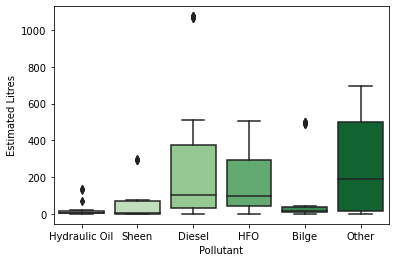

In [21]:
# Use a color palette
x = sns.boxplot( x=marine_data["Pollutant"], y=marine_data["Estimated Litres"], palette="Greens")

Mean of Pollution for each of Pollutants

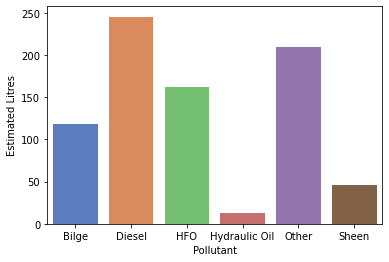

In [22]:
xyz = (marine_data.groupby(['Pollutant']).mean()['Estimated Litres'])
xyz = pd.DataFrame(xyz)
xyz['Pollutant'] = xyz.index
sns.barplot(x='Pollutant',y='Estimated Litres',data=xyz, palette="muted")

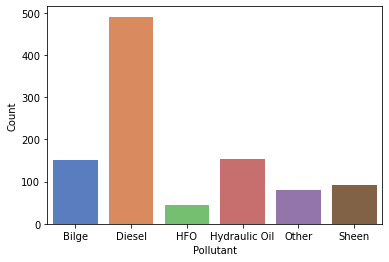

In [23]:
xyz = (marine_data.groupby(['Pollutant']).count()['Ship Type'])
xyz = pd.DataFrame(xyz)
xyz['Pollutant'] = xyz.index
xyz.columns = ['Count', 'Pollutant']
sns.barplot(x='Pollutant',y='Count',data=xyz, palette="muted")

Visualizing Correlation between all numerical categories

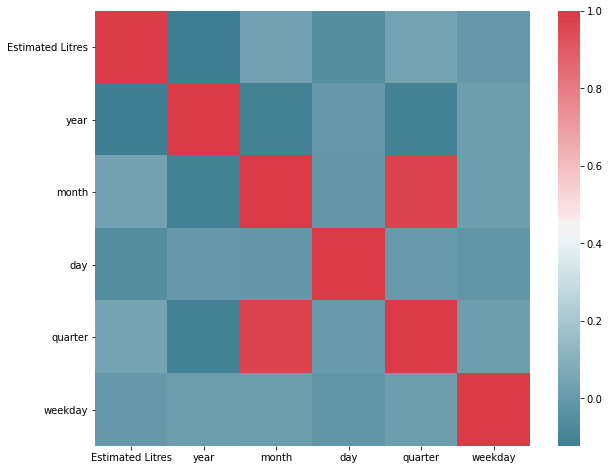

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
corr = marine_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Developing machine learning models for this dataset



In [28]:
marine_data.head()

,Region,Source,Ship Type,Area,Location,Pollutant,Estimated Litres,year,month,day,quarter,weekday
0,Cairns,Ship,Trading Ship,Port limits,"Trinity Inlet, Cairns",Hydraulic Oil,0.0,2013,4,11,2,3
1,Cairns,Ship,Trading,Port,"Lorim Point, Weipa",Hydraulic Oil,0.0,2003,10,30,4,3
2,Mackay,Ship,Recreation,Coastal,Shute Harbour,Sheen,0.0,2003,10,29,4,2
3,Brisbane,Ship,Trading,Port,Fishermans Islands Brisbane River,Hydraulic Oil,0.0,2003,12,7,4,6
4,Cairns,Ship,Commercial,Port,Thursday Island Harbour,Sheen,0.0,2006,4,16,2,6


In [35]:
new_data = marine_data.drop('Location', axis = 1)
#new_data = new_data.drop('Latitude', axis = 1)
#new_data = new_data.drop('Longitude', axis = 1)
new_data.head()

# Labels are the values we want to predict. Extracting the wine quality in labels
dependent = np.array(new_data.iloc[:,5])

# Remove the labels from the features, axis 1 refers to the columns
new_data= new_data.drop('Estimated Litres', axis = 1)

#Doing one hot encoding to convert all independent categorical columns into numerical columns
new_data = pd.get_dummies(new_data)

# Saving feature names for later use
new_data_list = list(new_data.columns)

# Convert to numpy array
new_data = np.array(new_data)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(new_data, dependent, 
                                                                            test_size = 0.10, random_state = 42)

In [36]:
#Trying Decision Trees on this dataset
decision_tree = DecisionTreeRegressor(random_state = 42).fit(train_data, train_labels)

#making predictions
pred_decision_tree = decision_tree.predict(test_data)

#Calculating the accuracy of Logistic Regression model
r2_score_decision_tree = sklearn.metrics.r2_score(test_labels, pred_decision_tree)
r2_score_decision_tree

0.6354103135078782

In [37]:
#Trying RandomForest on this dataset
Random_forest = RandomForestRegressor(n_estimators=6000, random_state = 42).fit(train_data, train_labels)

#making predictions
pred_Random_forest = Random_forest.predict(test_data)

#Calculating the accuracy of Logistic Regression model
r2_score_Random_forest = sklearn.metrics.r2_score(test_labels, pred_Random_forest)
r2_score_Random_forest

0.9230256235899651

In [38]:
#Trying GBM on this dataset
GBM = GradientBoostingRegressor(learning_rate=0.04, n_estimators=1300, random_state = 12).fit(train_data, train_labels)

#making predictions
pred_GBM = GBM.predict(test_data)

#Calculating the accuracy of Logistic Regression model
r2_score_GBM = sklearn.metrics.r2_score(test_labels, pred_GBM)
r2_score_GBM

0.8250711574653162

In [39]:
#Trying XGB on this dataset
XGB = xgb.XGBRegressor(learning_rate=0.05, reg_lambda=0.8, n_estimators=1100, random_state = 12).fit(train_data, train_labels)

#making predictions
pred_XGB = XGB.predict(test_data)

#Calculating the accuracy of Logistic Regression model
r2_score_XGB = sklearn.metrics.r2_score(test_labels, pred_XGB)
r2_score_XGB

0.9179109322754165